In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Анастасия\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
qazp = pd.read_csv('GAZP_101001_171001.txt')
sber = pd.read_csv('SBER_101001_171001.txt')

In [3]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [4]:
qazp.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,GAZP,D,20101001,0,160.54,60923751
1,GAZP,D,20101004,0,161.99,61902787
2,GAZP,D,20101005,0,162.44,61546943
3,GAZP,D,20101006,0,163.00,67921495
4,GAZP,D,20101007,0,162.49,43529081


In [5]:
res = pd.merge(sber, qazp, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,GAZP,D,0,160.54,60923751
1,SBER,D,20101004,0,89.88,194032721,GAZP,D,0,161.99,61902787
2,SBER,D,20101005,0,91.97,198775753,GAZP,D,0,162.44,61546943
3,SBER,D,20101006,0,91.20,210406027,GAZP,D,0,163.00,67921495
4,SBER,D,20101007,0,90.40,145137617,GAZP,D,0,162.49,43529081


In [6]:
res.shape

(1758, 11)

In [7]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

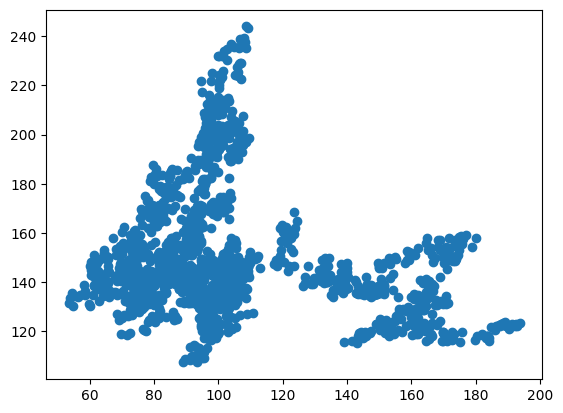

In [8]:
plt.figure()
plt.scatter(x,y)
plt.show()

In [9]:
# y = b0 + b1 * x

In [10]:
class hypothesis():
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def BGD(self, X, Y, alpha = 0.00005):
        dJ0 = sum(self.predict(X) - Y) / len(X)
        dJ1 = sum((self.predict(X) - Y) * X) / len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [11]:
reg = hypothesis()
print(reg.predict(0))
print(reg.predict(100))
print('Нач. ошибка:', reg.error(x, y))

0
0
Нач. ошибка: 11638.610642832773


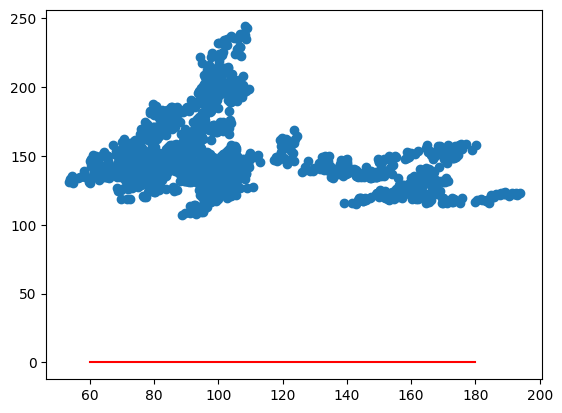

In [12]:
X0 = np.linspace(60, 180, 100)
Y0 = reg.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [13]:
np.linspace(60, 180, 100)

array([ 60.        ,  61.21212121,  62.42424242,  63.63636364,
        64.84848485,  66.06060606,  67.27272727,  68.48484848,
        69.6969697 ,  70.90909091,  72.12121212,  73.33333333,
        74.54545455,  75.75757576,  76.96969697,  78.18181818,
        79.39393939,  80.60606061,  81.81818182,  83.03030303,
        84.24242424,  85.45454545,  86.66666667,  87.87878788,
        89.09090909,  90.3030303 ,  91.51515152,  92.72727273,
        93.93939394,  95.15151515,  96.36363636,  97.57575758,
        98.78787879, 100.        , 101.21212121, 102.42424242,
       103.63636364, 104.84848485, 106.06060606, 107.27272727,
       108.48484848, 109.6969697 , 110.90909091, 112.12121212,
       113.33333333, 114.54545455, 115.75757576, 116.96969697,
       118.18181818, 119.39393939, 120.60606061, 121.81818182,
       123.03030303, 124.24242424, 125.45454545, 126.66666667,
       127.87878788, 129.09090909, 130.3030303 , 131.51515152,
       132.72727273, 133.93939394, 135.15151515, 136.36

In [14]:
reg.BGD(x, y)
J = reg.error(x, y)
print('ошибка: ', J)

ошибка:  3206.688732845396


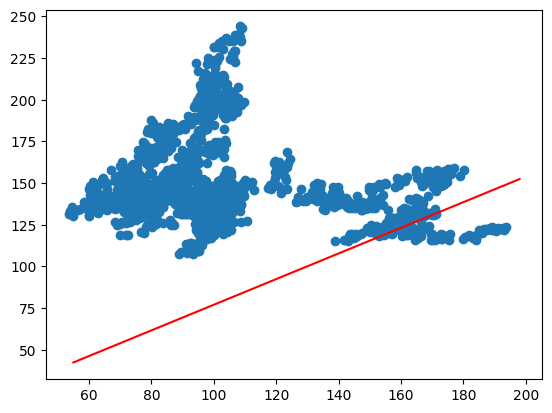

In [15]:
X0 = np.linspace(55, 198, 100)
Y0 = reg.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [16]:
class hypothesis():
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error (self, X, Y):
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))
    def BGD(self, X, Y, alpha = 0.000005, accuracy = 0.0001, max_steps = 5000):
        steps, errors = [], []
        step = 0
        old_err = self.error(X, Y)
        new_err = self.error(X, Y) - 1
        dJ = 1
        while dJ > accuracy and (step < max_steps):
            dJ0 = sum(self.predict(X)-Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = self.error(X, Y)
            dJ = abs(old_err - new_err)
            print(dJ)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [17]:
reg = hypothesis()
steps, errors = reg.BGD(x, y)
J = reg.error(x, y)
print('Конечное значение ошибки:', J)

1149.9292835097658
1021.9356565352846
907.3993626766387
805.700054590141
715.3989900380811
635.2186779724962
564.0248058423149
500.81019245018433
444.6805393388586
394.84177913234635
350.5888418481027
311.2956802571812
276.4064131811542
245.42746142928218
217.920565123517
193.49658362674927
171.8099903621537
152.55398464144446
135.45615134913442
120.27460708022454
106.79457821053029
94.82536248984661
84.19763117315915
74.76103352334553
66.38206979617553
58.942202616659415
52.336180028263925
46.47054649136203
41.26232076564884
36.63782197294154
32.53162723213018
28.88564612039272
25.64829886673533
22.773786651862792
20.221443691408922
17.955161936160266
15.942880250755934
14.156130844120753
12.569636535068184
11.160953155443622
9.910152032034603
8.799538055217454
7.81339934583707
6.937784978981426
6.160307619899868
5.46996828013971
4.857000714659762
4.312733258481785
3.829466148549045
3.4003625949653724
3.019352060785195
2.68104438203477
2.380653512918798
2.113929817532835
1.87709995020

0.0008466206020329992
0.0008466199353733828
0.0008466192714422505
0.0008466186088753602
0.0008466179447168543
0.0008466172830594587
0.0008466166134439845
0.0008466159588351729
0.0008466152887649514
0.0008466146257433138
0.0008466139636311709
0.0008466133024285227
0.0008466126389521378
0.0008466119693366636
0.0008466113104077522
0.0008466106473861146
0.0008466099798170035
0.0008466093204333447
0.0008466086576390808
0.000846607990524717
0.0008466073306863109
0.0008466066669825523
0.0008466060005503095
0.000846605339575035
0.0008466046717785503
0.0008466040103485284
0.0008466033491458802
0.0008466026829410112
0.000846602022420484
0.0008466013539418782
0.0008466006956950878
0.0008466000288080977
0.0008465993655590864
0.0008465987057206803
0.0008465980383789429
0.0008465973774036684
0.0008465967134725361
0.0008465960495414038
0.0008465953840186557
0.0008465947221338865
0.0008465940572932595
0.0008465933965453587
0.0008465927310226107
0.0008465920670914784
0.0008465914036150934
0.00084659074

0.0008462942078040214
0.0008462935456918785
0.0008462928863082197
0.0008462922203307244
0.0008462915554900974
0.0008462908961064386
0.00084629023240268
0.0008462895648335689
0.000846288904085668
0.0008462882419735251
0.0008462875796340086
0.0008462869138838869
0.0008462862513169966
0.0008462855864763696
0.0008462849250463478
0.0008462842604330945
0.0008462835969567095
0.0008462829371183034
0.0008462822688670713
0.0008462816113024019
0.0008462809460070275
0.000846280277301048
0.0008462796217827417
0.0008462789551231253
0.0008462782923288614
0.0008462776297619712
0.0008462769660582126
0.0008462763007628382
0.0008462756391054427
0.0008462749744921894
0.000846274309878936
0.0008462736536785087
0.0008462729822440451
0.0008462723255888704
0.0008462716593840014
0.0008462709968171112
0.0008462703342502209
0.0008462696700917149
0.0008462690068427037
0.0008462683435936924
0.0008462676785256917
0.0008462670175504172
0.0008462663506634271
0.0008462656921892631
0.0008462650282581308
0.0008462643625

0.0008459679479528859
0.0008459672844765009
0.0008459666205453686
0.0008459659597974678
0.0008459652947294671
0.0008459646339815663
0.0008459639677766972
0.000845963305891928
0.0008459626426429168
0.0008459619800760265
0.00084596131773651
0.0008459606556243671
0.0008459599914658611
0.0008459593282168498
0.0008459586640583439
0.0008459580005819589
0.0008459573425625422
0.0008459566770397942
0.0008459560126539145
0.0008459553505417716
0.0008459546841095289
0.0008459540265448595
0.0008459533619316062
0.0008459526961814845
0.0008459520386168151
0.0008459513705929567
0.0008459507112092979
0.0008459500456865499
0.0008459493822101649
0.0008459487212348904
0.0008459480598048685
0.0008459473913262627
0.0008459467330794723
0.0008459460666472296
0.0008459454056719551
0.0008459447401492071
0.0008459440821297903
0.0008459434172891633
0.0008459427563138888
0.0008459420844246779
0.0008459414318622294
0.0008459407620193815
0.0008459401014988543
0.0008459394371129747
0.0008459387756829528
0.00084593811

0.000845643139200547
0.0008456424704945675
0.0008456418108835351
0.0008456411478618975
0.0008456404839307652
0.0008456398211365013
0.0008456391597064794
0.0008456384996406996
0.0008456378313894675
0.0008456371715510613
0.000845636505573566
0.0008456358461899072
0.000845635184305138
0.0008456345206013793
0.0008456338555333787
0.0008456331941033568
0.0008456325303995982
0.0008456318730623025
0.000845631205720565
0.0008456305422441801
0.0008456298833152687
0.0008456292180198943
0.0008456285531792673
0.0008456278933408612
0.000845627230773971
0.0008456265645691019
0.0008456259038212011
0.0008456252435280476
0.00084562458050641
0.0008456239124825515
0.0008456232551452558
0.0008456225900772552
0.000845621928874607
0.00084562126403398
0.0008456206053324422
0.0008456199389001995
0.0008456192774701776
0.0008456186135390453
0.0008456179502900341
0.0008456172895421332
0.0008456166249288799
0.0008456159650904738
0.0008456152995677257
0.000845614640866188
0.0008456139719328348
0.0008456133130039234

0.0008453204402485426
0.0008453197733615525
0.0008453191114767833
0.0008453184452719142
0.0008453177886167396
0.0008453171240034862
0.0008453164616639697
0.0008453157986423321
0.0008453151342564524
0.0008453144755549147
0.0008453138123059034
0.0008453131486021448
0.0008453124839888915
0.0008453118257421011
0.0008453111599919794
0.0008453104987893312
0.000845309837586683
0.0008453091716091876
0.0008453085144992656
0.0008453078482943965
0.0008453071857275063
0.0008453065245248581
0.0008453058637769573
0.0008453051993910776
0.0008453045370515611
0.0008453038722109341
0.0008453032089619228
0.0008453025500330114
0.0008453018886029895
0.0008453012228528678
0.0008453005623323406
0.0008452998997654504
0.0008452992367438128
0.0008452985732674279
0.0008452979120647797
0.0008452972485883947
0.0008452965864762518
0.0008452959266378457
0.0008452952606603503
0.0008452946008219442
0.0008452939346170751
0.0008452932750060427
0.0008452926122117788
0.0008452919514638779
0.0008452912841221405
0.000845290

0.0008449925614968379
0.000844991900066816
0.0008449912374999258
0.0008449905747056619
0.0008449899144125084
0.0008449892516182445
0.0008449885895061016
0.0008449879251202219
0.0008449872650544421
0.0008449866036244202
0.0008449859383290459
0.0008449852750800346
0.0008449846172879916
0.0008449839519926172
0.0008449832921542111
0.0008449826277683314
0.0008449819661109359
0.000844981303316672
0.0008449806430235185
0.0008449799786376389
0.0008449793199361011
0.0008449786544133531
0.0008449779923012102
0.0008449773338270461
0.0008449766678495507
0.0008449760041457921
0.0008449753458990017
0.0008449746817404957
0.0008449740173546161
0.0008449733593351993
0.000844972693357704
0.0008449720317003084
0.0008449713739082654
0.0008449707063391543
0.0008449700487744849
0.0008449693800685054
0.0008449687252323201
0.0008449680565263407
0.0008449673996437923
0.0008449667361674074
0.000844966070189912
0.0008449654110336269
0.0008449647484667366
0.0008449640861272201
0.0008449634231055825
0.000844962763

0.0008446615036064031
0.0008446608435406233
0.0008446601798368647
0.0008446595188615902
0.0008446588572041946
0.0008446581973657885
0.0008446575327525352
0.0008446568706403923
0.0008446562119388545
0.0008446555466434802
0.0008446548856682057
0.0008446542258297995
0.0008446535566690727
0.0008446529018328874
0.0008446522356280184
0.0008446515757896123
0.000844650912540601
0.0008446502522474475
0.000844649591272173
0.0008446489273410407
0.0008446482652288978
0.0008446476017525129
0.000844646941686733
0.0008446462825304479
0.0008446456188266893
0.0008446449530765676
0.0008446442934655352
0.0008446436368103605
0.0008446429660580179
0.0008446423057648644
0.000844641648200195
0.0008446409854059311
0.0008446403205653041
0.0008446396602721506
0.0008446389997516235
0.0008446383349109965
0.0008446376757547114
0.0008446370093224687
0.0008446363515304256
0.0008446356850981829
0.0008446350295798766
0.0008446343638297549
0.000844633701717612
0.0008446330427887005
0.0008446323781754472
0.0008446317128

0.0008443279305083706
0.0008443272693057224
0.0008443266085578216
0.0008443259446266893
0.0008443252825145464
0.0008443246247225034
0.000844323959427129
0.0008443233009529649
0.0008443226352028432
0.0008443219767286791
0.0008443213150712836
0.000844320650685404
0.0008443199892553821
0.0008443193275979866
0.0008443186698059435
0.0008443180051926902
0.0008443173412615579
0.0008443166832421412
0.0008443160199931299
0.0008443153619737132
0.0008443146946319757
0.000844314036612559
0.000844313371771932
0.0008443127107966575
0.0008443120484571409
0.0008443113913472189
0.0008443107271887129
0.0008443100634849543
0.0008443094004633167
0.0008443087413070316
0.0008443080821507465
0.0008443074168553721
0.0008443067554253503
0.0008443060964964388
0.0008443054321105592
0.0008443047690889216
0.0008443041103873838
0.0008443034510037251
0.000844302784798856
0.0008443021215498447
0.0008443014610293176
0.0008443008036920219
0.0008443001381692739
0.0008442994787856151
0.0008442988159913511
0.0008442981529

0.0008440712231276848
0.0008440705589691788
0.0008440698954927939
0.0008440692374733771
0.0008440685764981026
0.0008440679146133334
0.0008440672525011905
0.0008440665917532897
0.0008440659278221574
0.0008440652704848617
0.0008440646033704979
0.0008440639458058286
0.000844063284148433
0.0008440626218089164
0.0008440619606062683
0.0008440612991762464
0.0008440606384283456
0.000844059975406708
0.0008440593130671914
0.0008440586536835326
0.000844057991344016
0.0008440573299139942
0.0008440566678018513
0.0008440560068265768
0.0008440553463060496
0.0008440546851034014
0.0008440540202627744
0.0008440533611064893
0.0008440527001312148
0.0008440520364274562
0.0008440513786354131
0.0008440507099294337
0.0008440500548658747
0.0008440493945727212
0.0008440487288225995
0.000844048069211567
0.0008440474073267978
0.0008440467454420286
0.0008440460837846331
0.0008440454216724902
0.0008440447622888314
0.0008440440997219412
0.0008440434360181825
0.0008440427786808868
0.0008440421167961176
0.000844041453

0.0008437887981926906
0.0008437881388090318
0.0008437874766968889
0.0008437868159489881
0.0008437861529273505
0.0008437854949079338
0.0008437848307494278
0.0008437841711383953
0.0008437835083441314
0.0008437828464593622
0.000843782185256714
0.0008437815272372973
0.0008437808617145492
0.0008437802014213958
0.0008437795443114737
0.0008437788803803414
0.0008437782162218355
0.0008437775563834293
0.0008437768974545179
0.0008437762335233856
0.0008437755727754848
0.0008437749118002102
0.0008437742503701884
0.0008437735916686506
0.0008437729263732763
0.0008437722699454753
0.0008437716028311115
0.0008437709448116948
0.0008437702831542992
0.0008437696228611458
0.0008437689577931451
0.0008437683006832231
0.0008437676383437065
0.0008437669762315636
0.0008437663150289154
0.0008437656556452566
0.0008437649889856402
0.0008437643334673339
0.0008437636683993333
0.0008437630099251692
0.0008437623489498947
0.0008437616854735097
0.0008437610260898509
0.0008437603621587186
0.0008437597039119282
0.000843759

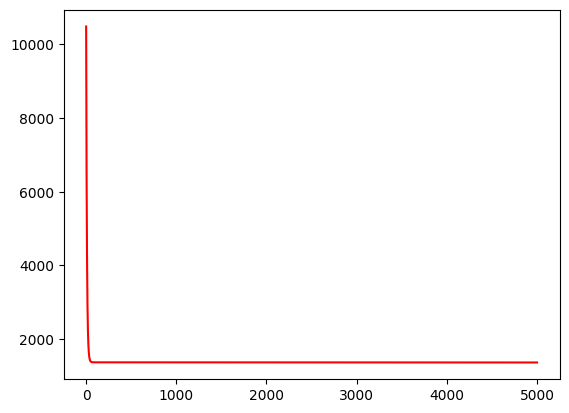

In [18]:
plt.figure()
plt.plot(steps, errors, 'r')
plt.show()

In [19]:
reg = hypothesis()
reg.BGD(x,y)
X0 = np.linspace(55, 198, 100)
Y0 = reg.predict(X0)

1149.9292835097658
1021.9356565352846
907.3993626766387
805.700054590141
715.3989900380811
635.2186779724962
564.0248058423149
500.81019245018433
444.6805393388586
394.84177913234635
350.5888418481027
311.2956802571812
276.4064131811542
245.42746142928218
217.920565123517
193.49658362674927
171.8099903621537
152.55398464144446
135.45615134913442
120.27460708022454
106.79457821053029
94.82536248984661
84.19763117315915
74.76103352334553
66.38206979617553
58.942202616659415
52.336180028263925
46.47054649136203
41.26232076564884
36.63782197294154
32.53162723213018
28.88564612039272
25.64829886673533
22.773786651862792
20.221443691408922
17.955161936160266
15.942880250755934
14.156130844120753
12.569636535068184
11.160953155443622
9.910152032034603
8.799538055217454
7.81339934583707
6.937784978981426
6.160307619899868
5.46996828013971
4.857000714659762
4.312733258481785
3.829466148549045
3.4003625949653724
3.019352060785195
2.68104438203477
2.380653512918798
2.113929817532835
1.87709995020

0.0008466756721645652
0.0008466750059596961
0.0008466743502140162
0.0008466736817354104
0.0008466730193958938
0.0008466723529636511
0.0008466716935799923
0.0008466710273751232
0.000846670364126112
0.0008466697015592217
0.0008466690378554631
0.0008466683721053414
0.0008466677122669353
0.0008466670460620662
0.0008466663814488129
0.00084666571933667
0.0008466650567697798
0.0008466643905649107
0.0008466637307265046
0.0008466630663406249
0.0008466624001357559
0.000846661738023613
0.0008466610750019754
0.0008466604126624588
0.0008466597469123371
0.0008466590836633259
0.0008466584199595673
0.0008466577585295454
0.0008466570907330606
0.0008466564322588965
0.0008466557669635222
0.0008466551009860268
0.0008466544391012576
0.0008466537772164884
0.000846653110556872
0.0008466524468531134
0.0008466517865599599
0.0008466511210372119
0.0008466504573334532
0.0008466497949939367
0.0008466491328817938
0.000846648465085309
0.0008466478041100345
0.0008466471417705179
0.0008466464742014068
0.00084664581095

0.0008463917165499879
0.0008463910528462293
0.0008463903905067127
0.0008463897236197226
0.0008463890637813165
0.0008463883973490738
0.0008463877359190519
0.0008463870719879196
0.0008463864107852714
0.0008463857448077761
0.0008463850813313911
0.000846384420810864
0.0008463837536965002
0.0008463830909022363
0.0008463824315185775
0.0008463817653137085
0.0008463811020646972
0.0008463804390430596
0.000846379776703543
0.000846379111180795
0.0008463784495233995
0.0008463777833185304
0.0008463771255264874
0.0008463764577300026
0.0008463757949357387
0.000846375130549859
0.0008463744716209476
0.0008463738047339575
0.000846373143758683
0.0008463724768716929
0.0008463718168059131
0.0008463711526474071
0.0008463704875794065
0.0008463698291052424
0.0008463691603992629
0.0008463684985144937
0.0008463678350381088
0.0008463671733807132
0.0008463665101317019
0.000846365845973196
0.0008463651827241847
0.0008463645194751734
0.0008463638546345464
0.0008463631929771509
0.0008463625285912713
0.00084636186579

0.0008461111651740794
0.0008461105096557731
0.0008461098407224199
0.0008461091833851242
0.0008461085135422763
0.00084610785802397
0.0008461071872716275
0.0008461065294795844
0.0008461058644115838
0.0008461052016173198
0.0008461045351850771
0.0008461038758014183
0.0008461032127797807
0.0008461025486212748
0.0008461018876460003
0.0008461012209863839
0.0008461005591016146
0.000846099896079977
0.0008460992339678342
0.0008460985688998335
0.0008460979074698116
0.0008460972446755477
0.000846096578925426
0.0008460959190870199
0.0008460952519726561
0.0008460945953174814
0.0008460939268388756
0.0008460932629077433
0.0008460926030693372
0.0008460919393655786
0.0008460912752070726
0.0008460906124128087
0.0008460899498459185
0.0008460892859147862
0.0008460886242573906
0.0008460879585072689
0.0008460873016247206
0.0008460866310997517
0.0008460859739898297
0.0008460853064207186
0.000846084643399081
0.0008460839867439063
0.00084608331576419
0.0008460826554710366
0.0008460819922220253
0.000846081331701

0.0008456053626559878
0.0008456046950868767
0.0008456040366127127
0.0008456033710899646
0.0008456027069314587
0.0008456020470930525
0.0008456013836166676
0.0008456007210497773
0.0008456000527985452
0.0008455994009182177
0.0008455987317574909
0.0008455980728285795
0.0008455974050320947
0.0008455967408735887
0.0008455960844457877
0.0008455954177861713
0.0008455947561287758
0.0008455940942440066
0.0008455934291760059
0.0008455927672912367
0.0008455921056338411
0.0008455914432943246
0.0008455907795905659
0.0008455901188426651
0.0008455894530925434
0.0008455887914351479
0.0008455881295503787
0.0008455874653918727
0.0008455868053260929
0.0008455861391212238
0.0008455854788280703
0.0008455848155790591
0.0008455841509658057
0.0008455834913547733
0.0008455828296973777
0.0008455821609913983
0.0008455815034267289
0.0008455808397229703
0.0008455801785203221
0.0008455795132249477
0.0008455788513401785
0.000845578189000662
0.0008455775221136719
0.0008455768675048603
0.0008455761978893861
0.000845575

0.0008453290499801369
0.0008453283880953677
0.0008453277196167619
0.0008453270656900713
0.0008453263960745971
0.0008453257396467961
0.000845325070713443
0.0008453244120119052
0.0008453237480807729
0.0008453230886971141
0.0008453224234017398
0.0008453217619717179
0.0008453210969037173
0.0008453204402485426
0.0008453197733615525
0.0008453191114767833
0.0008453184452719142
0.0008453177886167396
0.0008453171240034862
0.0008453164616639697
0.0008453157986423321
0.0008453151342564524
0.0008453144755549147
0.0008453138123059034
0.0008453131486021448
0.0008453124839888915
0.0008453118257421011
0.0008453111599919794
0.0008453104987893312
0.000845309837586683
0.0008453091716091876
0.0008453085144992656
0.0008453078482943965
0.0008453071857275063
0.0008453065245248581
0.0008453058637769573
0.0008453051993910776
0.0008453045370515611
0.0008453038722109341
0.0008453032089619228
0.0008453025500330114
0.0008453018886029895
0.0008453012228528678
0.0008453005623323406
0.0008452998997654504
0.0008452992

0.0008450607779195707
0.0008450601101230859
0.0008450594514215481
0.0008450587897641526
0.000845058126060394
0.0008450574646303721
0.0008450568063835817
0.0008450561351764918
0.0008450554789760645
0.0008450548166365479
0.0008450541540696577
0.0008450534899111517
0.0008450528293906245
0.0008450521652321186
0.0008450515031199757
0.0008450508412352065
0.0008450501807146793
0.0008450495186025364
0.0008450488537619094
0.0008450481907402718
0.0008450475309018657
0.0008450468669707334
0.0008450462059954589
0.0008450455454749317
0.0008450448788153153
0.0008450442194316565
0.0008450435561826453
0.0008450428933883813
0.0008450422324131068
0.0008450415721199533
0.0008450409056877106
0.0008450402449398098
0.0008450395821455459
0.0008450389229892608
0.0008450382576938864
0.0008450375919437647
0.0008450369366528321
0.0008450362720395788
0.0008450356074263254
0.0008450349496342824
0.0008450342850210291
0.0008450336201804021
0.0008450329621609853
0.0008450322966382373
0.000845031633389226
0.0008450309

0.0008447879527011537
0.0008447872892247688
0.0008447866307506047
0.0008447859690932091
0.0008447853031157138
0.0008447846446415497
0.0008447839827567805
0.0008447833181435271
0.0008447826567135053
0.0008447819950561097
0.0008447813320344721
0.000844780672196066
0.000844780006673318
0.0008447793479717802
0.0008447786840406479
0.0008447780237474944
0.0008447773566331307
0.0008447767031611875
0.0008447760340004606
0.0008447753743894282
0.0008447747118225379
0.000844774049028274
0.0008447733873708785
0.0008447727275324723
0.000844772062237098
0.0008447714037629339
0.0008447707389223069
0.0008447700788565271
0.0008447694137885264
0.0008447687553143624
0.000844768088654746
0.000844767433591187
0.0008447667657947022
0.0008447661057289224
0.0008447654452083952
0.0008447647760476684
0.0008447641203019884
0.0008447634581898456
0.0008447627940313396
0.000844762131691823
0.0008447614713986695
0.0008447608106507687
0.0008447601476291311
0.0008447594832432515
0.0008447588220406033
0.000844758158564

0.0008445138944352948
0.0008445132320957782
0.0008445125745311088
0.0008445119099178555
0.0008445112466688443
0.0008445105881946802
0.0008445099222171848
0.0008445092651072628
0.0008445085993571411
0.0008445079390639876
0.0008445072776339657
0.0008445066173408122
0.0008445059502264485
0.0008445052926617791
0.0008445046287306468
0.0008445039675279986
0.0008445033047337347
0.0008445026451227022
0.0008445019807368226
0.0008445013222626585
0.0008445006590136472
0.0008444999937182729
0.0008444993352441088
0.0008444986724498449
0.0008444980121566914
0.0008444973493624275
0.0008444966858860425
0.0008444960278666258
0.0008444953627986251
0.0008444946997769875
0.000844494038801713
0.0008444933814644173
0.0008444927145774273
0.0008444920570127579
0.0008444913919447572
0.0008444907298326143
0.0008444900679478451
0.0008444894035619654
0.0008444887471341644
0.0008444880854767689
0.0008444874188171525
0.0008444867601156147
0.0008444861000498349
0.0008444854349818343
0.0008444847715054493
0.000844484

0.0008442339694738621
0.0008442333121365664
0.0008442326488875551
0.0008442319856385438
0.0008442313269370061
0.0008442306609595107
0.0008442300027127203
0.0008442293385542143
0.0008442286805347976
0.0008442280152394233
0.0008442273542641487
0.0008442266941983689
0.0008442260325409734
0.0008442253717930726
0.0008442247062703245
0.0008442240480235341
0.0008442233847745229
0.0008442227235718747
0.0008442220630513475
0.0008442214011665783
0.0008442207381449407
0.0008442200767149188
0.0008442194164217653
0.0008442187538548751
0.0008442180921974796
0.000844217430540084
0.0008442167682005675
0.0008442161072252929
0.0008442154467047658
0.0008442147855021176
0.0008442141204341169
0.0008442134608230845
0.0008442127989383152
0.000844212137053546
0.0008442114756235242
0.0008442108148756233
0.0008442101539003488
0.0008442094892870955
0.0008442088292213157
0.0008442081684734148
0.0008442075074981403
0.0008442068456133711
0.0008442061805453704
0.0008442055220712064
0.0008442048597316898
0.0008442041

0.000843956125436307
0.00084395546059568
0.0008439548014393949
0.0008439541397819994
0.000843953482899451
0.0008439528146482189
0.0008439521579930442
0.000843951496108275
0.000843950831949769
0.0008439501693828788
0.0008439495088623516
0.000843948852207177
0.0008439481853201869
0.0008439475293471332
0.0008439468649612536
0.0008439462033038581
0.0008439455416464625
0.0008439448795343196
0.0008439442185590451
0.0008439435573563969
0.0008439428966084961
0.0008439422369974636
0.0008439415717020893
0.0008439409111815621
0.0008439402536168927
0.000843939586502529
0.0008439389282557386
0.0008439382672804641
0.0008439376049409475
0.0008439369441930467
0.0008439362813987827
0.0008439356179223978
0.0008439349599029811
0.0008439342980182118
0.0008439336352239479
0.0008439329778866522
0.0008439323109996621
0.0008439316536623664
0.0008439309915502236
0.0008439303289833333
0.0008439296655069484
0.0008439290077149053
0.0008439283449206414
0.0008439276862191036
0.000843927021833224
0.00084392636063057

0.0008436750613327604
0.0008436744003574859
0.0008436737407464534
0.0008436730811354209
0.0008436724199327728
0.0008436717541826511
0.0008436710986643448
0.0008436704365522019
0.0008436697696652118
0.0008436691148290265
0.0008436684493062785
0.000843667789695246
0.000843667131903203
0.000843666466380455
0.0008436658063146751
0.0008436651435204112
0.0008436644832272577
0.0008436638229341042
0.0008436631651420612
0.0008436624989371921
0.0008436618379619176
0.0008436611765318958
0.0008436605180577317
0.0008436598548087204
0.0008436591947429406
0.0008436585333129187
0.0008436578716555232
0.0008436572138634801
0.0008436565476586111
0.0008436558889570733
0.0008436552261628094
0.0008436545651875349
0.000843653903075392
0.0008436532461928437
0.0008436525831712061
0.0008436519187853264
0.000843651259174294
0.0008436506002453825
0.0008436499369963713
0.0008436492762484704
0.0008436486150458222
0.0008436479552074161
0.0008436472912762838
0.0008436466348484828
0.0008436459690983611
0.0008436453092

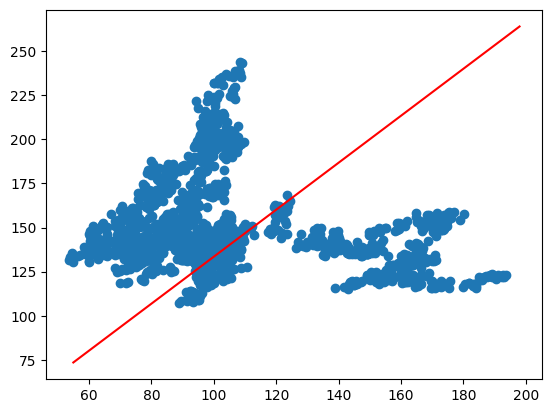

In [20]:
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()